In [2]:
from lib import draw_examples, make_test, run_test
import torch
import numpy as np
from torchtyping import TensorType as TT
tensor = torch.tensor

In [7]:
def arange(i: int):
    "Use this function to replace a for-loop."
    return torch.tensor(range(i))

def where(q, a, b):
    "Use this function to replace an if-statement."
    return (q * a) + (~q) * b

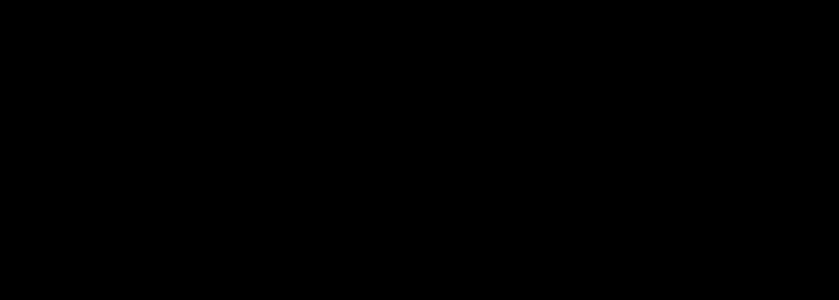

In [8]:
# Puzzle 1

def ones_spec(out):
    for i in range(len(out)):
        out[i] = 1
        
def ones(i: int) -> TT["i"]:
    return where(arange(i) >= 0, 1, 0)

test_ones = make_test("one", ones, ones_spec, add_sizes=["i"])

In [9]:
run_test(test_ones);

Correct!


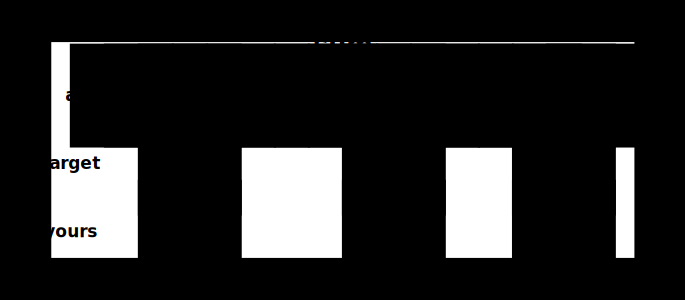

In [68]:
# Puzzle 2

def sum_spec(a, out):
    out[0] = 0
    for i in range(len(a)):
        out[0] += a[i]
        
def sum(a: TT["i"]) -> TT[1]:
    return a @ ones(a.shape[0])[:, None]


test_sum = make_test("sum", sum, sum_spec)

In [69]:
run_test(test_sum);

Correct!


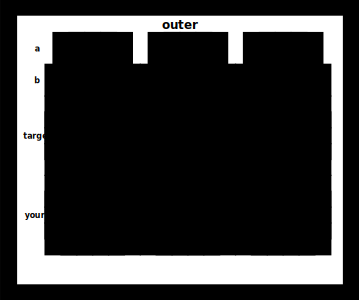

In [26]:
# Puzzle 3

def outer_spec(a, b, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            out[i][j] = a[i] * b[j]
            
def outer(a: TT["i"], b: TT["j"]) -> TT["i", "j"]:
    return a[:, None] @ b[None, :]
    
test_outer = make_test("outer", outer, outer_spec)

In [27]:
run_test(test_outer);

Correct!


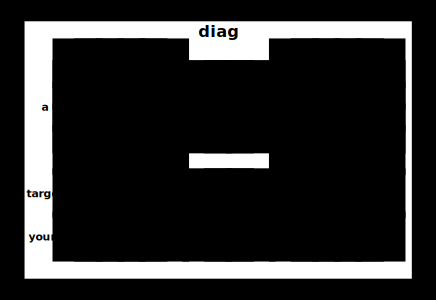

In [42]:
# Puzzle 4

def diag_spec(a, out):
    for i in range(len(a)):
        out[i] = a[i][i]
        
def diag(a: TT["i", "i"]) -> TT["i"]:
    i = a.shape[0]
    return a[arange(i), arange(i)]


test_diag = make_test("diag", diag, diag_spec)

In [43]:
run_test(test_diag);

Correct!


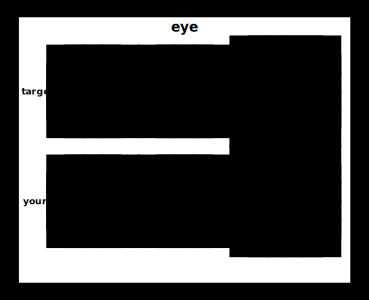

In [46]:
# Puzzle 5

def eye_spec(out):
    for i in range(len(out)):
        out[i][i] = 1
        
def eye(j: int) -> TT["j", "j"]:
    return 1 * (arange(j) == arange(j)[:, None])
    
test_eye = make_test("eye", eye, eye_spec, add_sizes=["j"])

In [48]:
run_test(test_eye);

Correct!


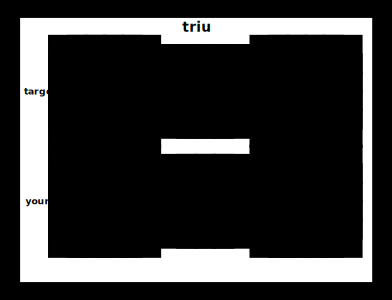

In [70]:
# Puzzle 6

def triu_spec(out):
    for i in range(len(out)):
        for j in range(len(out)):
            if i <= j:
                out[i][j] = 1
            else:
                out[i][j] = 0
                
def triu(j: int) -> TT["j", "j"]:
    return 1 * (arange(j) >= arange(j)[:, None])


test_triu = make_test("triu", triu, triu_spec, add_sizes=["j"])

In [71]:
run_test(test_triu);

Correct!


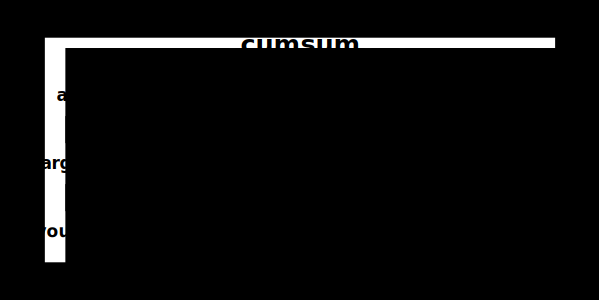

In [74]:
# Puzzle 7

def cumsum_spec(a, out):
    total = 0
    for i in range(len(out)):
        out[i] = total + a[i]
        total += a[i]

def cumsum(a: TT["i"]) -> TT["i"]:
    i = a.shape[0]
    return (1 * (arange(i) <= arange(i)[:, None])) @ a

test_cumsum = make_test("cumsum", cumsum, cumsum_spec)

In [75]:
run_test(test_cumsum);

Correct!


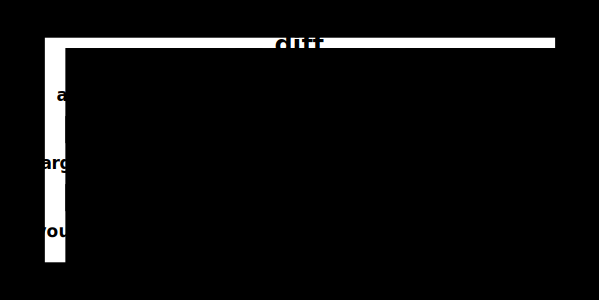

In [110]:
# Puzzle 8

def diff_spec(a, out):
    out[0] = a[0]
    for i in range(1, len(out)):
        out[i] = a[i] - a[i - 1]

def diff(a: TT["i"], i: int) -> TT["i"]:
    return a - (a @ (1 * (arange(i) == arange(i)[:, None] + 1)))

test_diff = make_test("diff", diff, diff_spec, add_sizes=["i"])

In [112]:
run_test(test_diff);

Correct!


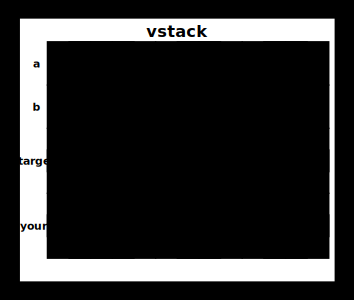

In [116]:
# Puzzle 9

def vstack_spec(a, b, out):
    for i in range(len(out[0])):
        out[0][i] = a[i]
        out[1][i] = b[i]

def vstack(a: TT["i"], b: TT["i"]) -> TT[2, "i"]:
    return where(arange(2)[:, None] == 0, a, b)


test_vstack = make_test("vstack", vstack, vstack_spec)

In [117]:
run_test(test_vstack);

Correct!


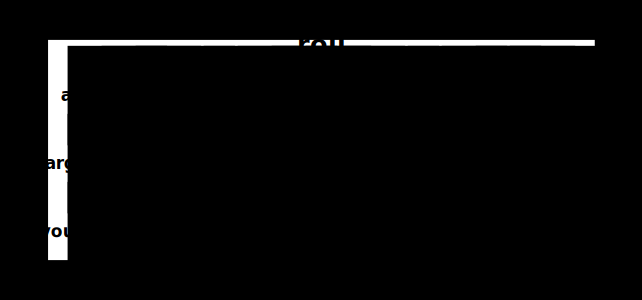

In [119]:
# Puzzle 10
# (I cheated on this!)

def roll_spec(a, out):
    for i in range(len(out)):
        if i + 1 < len(out):
            out[i] = a[i + 1]
        else:
            out[i] = a[i + 1 - len(out)]
            
def roll(a: TT["i"], i: int) -> TT["i"]:
    return a[(arange(i) + 1) % i]


test_roll = make_test("roll", roll, roll_spec, add_sizes=["i"])

In [120]:
run_test(test_roll);

Correct!


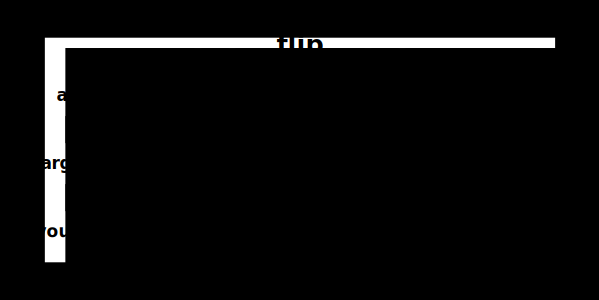

In [124]:
# Puzzle 11

def flip_spec(a, out):
    for i in range(len(out)):
        out[i] = a[len(out) - i - 1]
        
def flip(a: TT["i"], i: int) -> TT["i"]:
    return a[i - arange(i) - 1]


test_flip = make_test("flip", flip, flip_spec, add_sizes=["i"])

In [126]:
run_test(test_flip);

Correct!


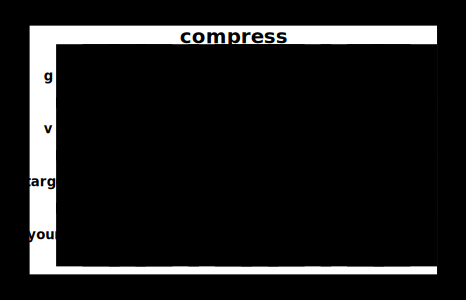

In [225]:
# Puzzle 12

def compress_spec(g, v, out):
    j = 0
    for i in range(len(g)):
        if g[i]:
            out[j] = v[i]
            j += 1

def compress(g: TT["i", bool], v: TT["i"], i:int) -> TT["i"]:
    return (1 * (g * cumsum(1 * g) == (arange(i) + 1)[:, None])) @ v


test_compress = make_test("compress", compress, compress_spec, add_sizes=["i"])

In [226]:
run_test(test_compress);

Correct!


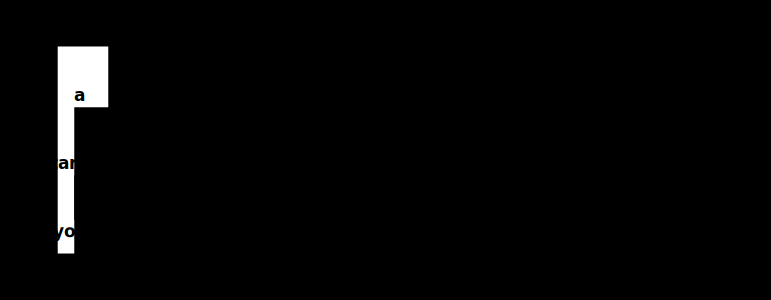

In [233]:
# Puzzle 13

def pad_to_spec(a, out):
    for i in range(min(len(out), len(a))):
        out[i] = a[i]


def pad_to(a: TT["i"], i: int, j: int) -> TT["j"]:
    return where(arange(i) == arange(j)[:, None], 1, 0) @ a


test_pad_to = make_test("pad_to", pad_to, pad_to_spec, add_sizes=["i", "j"])

In [234]:
run_test(test_pad_to);

Correct!


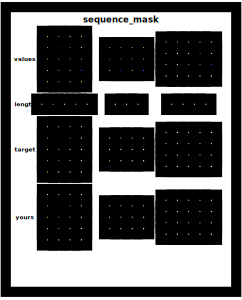

In [264]:
# Puzzle 14

def sequence_mask_spec(values, length, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            if j < length[i]:
                out[i][j] = values[i][j]
            else:
                out[i][j] = 0
    
def sequence_mask(values: TT["i", "j"], length: TT["i", int]) -> TT["i", "j"]:
    return (arange(values.shape[1]) < length[:, None]) * values


def constraint_set_length(d):
    d["length"] = d["length"] % d["values"].shape[1]
    return d


test_sequence = make_test("sequence_mask",
    sequence_mask, sequence_mask_spec, constraint=constraint_set_length
)

In [265]:
run_test(test_sequence);

Correct!


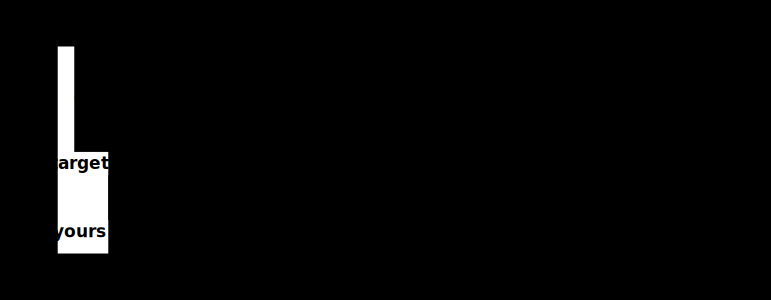

In [272]:
# Puzzle 15

def bincount_spec(a, out):
    for i in range(len(a)):
        out[a[i]] += 1
        
def bincount(a: TT["i"], j: int) -> TT["j"]:
    return (1 * (a == arange(j)[:, None])) @ ones(a.shape[0])


def constraint_set_max(d):
    d["a"] = d["a"] % d["return"].shape[0]
    return d


test_bincount = make_test("bincount",
    bincount, bincount_spec, add_sizes=["j"], constraint=constraint_set_max
)

In [273]:
run_test(test_bincount);

Correct!


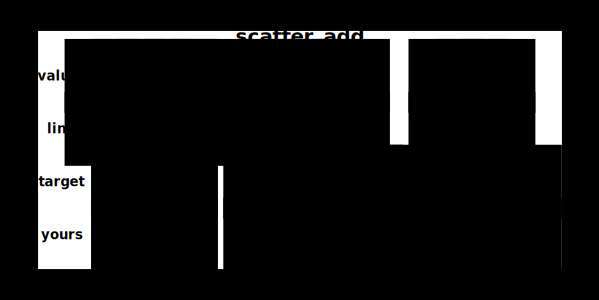

In [279]:
# Puzzle 16

def scatter_add_spec(values, link, out):
    for j in range(len(values)):
        out[link[j]] += values[j]
        
def scatter_add(values: TT["i"], link: TT["i"], j: int) -> TT["j"]:
    return (1 * (link == arange(j)[:, None])) @ values


def constraint_set_max(d):
    d["link"] = d["link"] % d["return"].shape[0]
    return d


test_scatter_add = make_test("scatter_add",
    scatter_add, scatter_add_spec, add_sizes=["j"], constraint=constraint_set_max
)

In [280]:
run_test(test_scatter_add);

Correct!


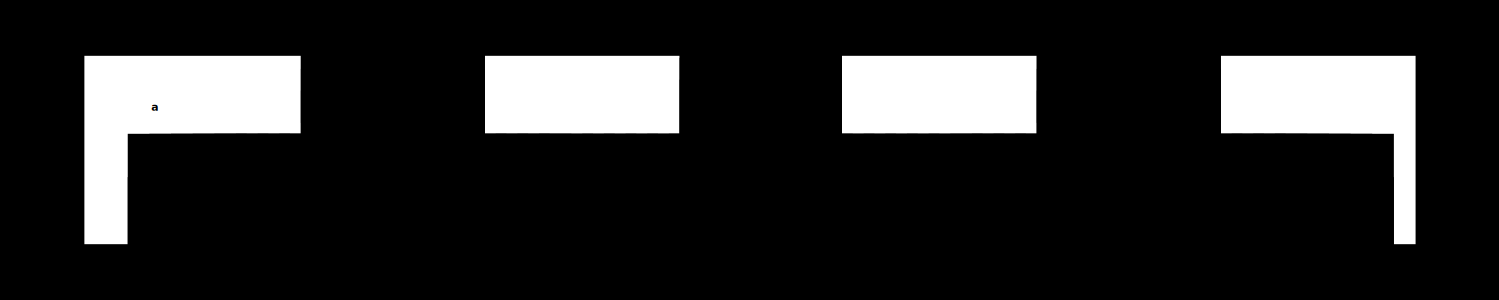

In [587]:
# Puzzle 17

def flatten_spec(a, out):
    k = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            out[k] = a[i][j]
            k += 1

def flatten(a: TT["i", "j"], i:int, j:int) -> TT["i * j"]:
    t = arange(i * j)
    return ones(i) @ (a @ (1 * (t%j == arange(j)[:, None])) * (t//j == arange(i)[:, None]))

test_flatten = make_test("flatten", flatten, flatten_spec, add_sizes=["i", "j"])

In [588]:
run_test(test_flatten);

Correct!


/var/folders/1w/1sgymhfj3szg1r0_cb6jvstw0000gn/T/ipykernel_23489/3140336722.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/var/folders/1w/1sgymhfj3szg1r0_cb6jvstw0000gn/T/ipykernel_23489/3140336722.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/var/folders/1w/1sgymhfj3szg1r0_cb6jvstw0000gn/T/ipykernel_23489/3140336722.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (D

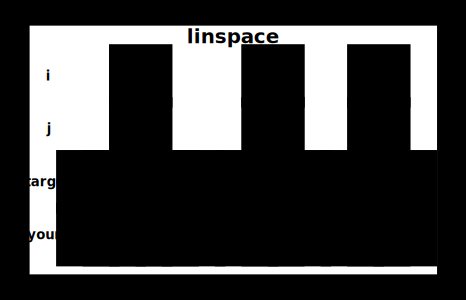

In [351]:
# Puzzle 18

def linspace_spec(i, j, out):
    for k in range(len(out)):
        out[k] = float(i + (j - i) * k / max(1, len(out) - 1))

def linspace(i: TT[1], j: TT[1], n: int) -> TT["n", float]:
    return (i + (j - i) * (1. * arange(n)) / max(1, n - 1))

test_linspace = make_test("linspace", linspace, linspace_spec, add_sizes=["n"])

In [352]:
run_test(test_linspace);

Correct!


/var/folders/1w/1sgymhfj3szg1r0_cb6jvstw0000gn/T/ipykernel_23489/3140336722.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/var/folders/1w/1sgymhfj3szg1r0_cb6jvstw0000gn/T/ipykernel_23489/3140336722.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/var/folders/1w/1sgymhfj3szg1r0_cb6jvstw0000gn/T/ipykernel_23489/3140336722.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (D

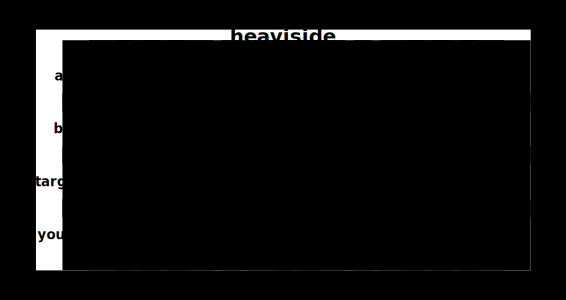

In [356]:
# Puzzle 19

def heaviside_spec(a, b, out):
    for k in range(len(out)):
        if a[k] == 0:
            out[k] = b[k]
        else:
            out[k] = int(a[k] > 0)

def heaviside(a: TT["i"], b: TT["i"]) -> TT["i"]:
    return where(a == 0, b, 1 * (a > 0))

test_heaviside = make_test("heaviside", heaviside, heaviside_spec)

In [358]:
run_test(test_heaviside);

Correct!


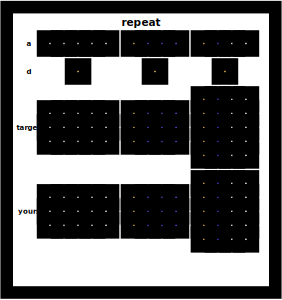

In [364]:
# Puzzle 20

def repeat_spec(a, d, out):
    for i in range(d[0]):
        for k in range(len(a)):
            out[i][k] = a[k]

def constraint_set(d):
    d["d"][0] = d["return"].shape[0]
    return d

            
def repeat(a: TT["i"], d: TT[1]) -> TT["d", "i"]:
    return a * ones(d)[:, None]

test_repeat = make_test("repeat", repeat, repeat_spec, constraint=constraint_set)

In [366]:
run_test(test_repeat);

Correct!


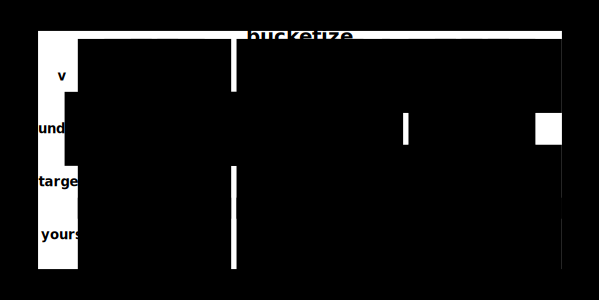

In [391]:
# Puzzle 21

def bucketize_spec(v, boundaries, out):
    for i, val in enumerate(v):
        out[i] = 0
        for j in range(len(boundaries)-1):
            if val >= boundaries[j]:
                out[i] = j + 1
        if val >= boundaries[-1]:
            out[i] = len(boundaries)


def constraint_set(d):
    d["boundaries"] = np.abs(d["boundaries"]).cumsum()
    return d

            
def bucketize(v: TT["i"], boundaries: TT["j"]) -> TT["i"]:
    return (1 * (boundaries <= v[:, None])) @ ones(boundaries.shape[0])

test_bucketize = make_test("bucketize", bucketize, bucketize_spec,
                           constraint=constraint_set)

In [392]:
run_test(test_bucketize);

Correct!
